<a href="https://colab.research.google.com/github/jagodek/machine-learning-basics/blob/main/lab6/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import loadmat
from google.colab import files
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
uploaded = files.upload()

Saving leukemia.mat to leukemia (1).mat


In [ ]:
data = loadmat(io.BytesIO(uploaded['leukemia.mat']))

In [ ]:
print(data['X'].shape)
print(data['Y'].shape)

(72, 7070)
(72, 1)


In [ ]:
print(np.isnan(data['X']).any())
print(np.isnan(data["Y"]).any())

False
False


In [ ]:
X_original=data['X']
Y_original = data['Y'].reshape(-1)

0.05478395061728396
3.3055555555555554


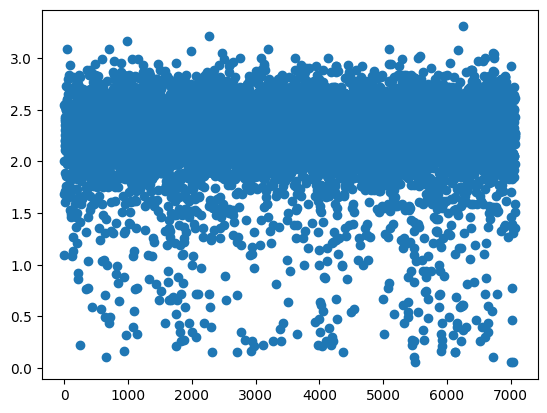

In [ ]:
variance_per_column = np.var(data['X'], axis=0)
print(variance_per_column.min())
print(variance_per_column.max())
plt.scatter(np.arange(data['X'].shape[1]),variance_per_column)

In [ ]:
tresh = 2.75

In [ ]:
np.count_nonzero(variance_per_column>=tresh)

241

In [ ]:
X = None

cond = (variance_per_column>=tresh)
X = data['X'][:,cond]

In [ ]:
print(X.shape)

(72, 241)


2.75
3.3055555555555554


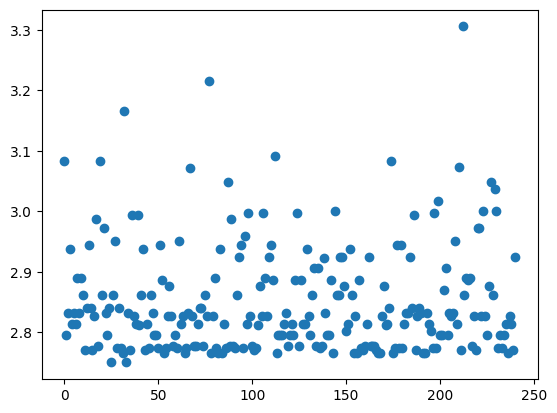

In [ ]:
variance_per_column2 = np.var(X, axis=0)
print(variance_per_column2.min())
print(variance_per_column2.max())
plt.scatter(np.arange(X.shape[1]),variance_per_column2)

In [ ]:
Y = data['Y'].reshape(-1)

In [ ]:
Y.shape

(72,)

In [ ]:
X.shape

(72, 241)

In [ ]:
cross_val_score(LogisticRegression(),X_original,Y_original,cv=6).mean()

0.9583333333333334

In [ ]:
cross_val_score(LogisticRegression(),X,Y,cv=6).mean()

0.9305555555555557

In [ ]:
estimatorLogReg = LogisticRegression()
selector1 = RFE(estimatorLogReg,n_features_to_select=23, step=1)
selector1 = selector1.fit(X, Y)



In [ ]:
selector1.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
selector1.ranking_

array([219,  72, 183, 218, 192, 156, 144,  62,  70, 129, 105, 203, 153,
        27, 200, 202, 107,   3, 141,   1,  68, 217, 172, 138,   1,  98,
        79, 139,  95, 166,  38,  12, 109, 216,  15, 210, 119, 160,   1,
        86,  75, 212,  78,  52, 108,  32, 126, 132, 146,  93, 162,  60,
        71, 208, 112, 111, 211, 215,   1, 187, 178, 148, 142, 151, 190,
       188, 196, 121,  89,  35,   1, 134, 152,   1, 137,   1, 201,   7,
        44, 165, 182, 140,  34, 194, 123, 169,  33,  37, 155, 133,  45,
       154, 110,   1,  49,   1,  13,  53, 147, 136, 101, 163, 180, 159,
        30,  11, 122,   1, 213, 198, 214, 130,   1,  41,  24, 158, 125,
        96,  18, 174,  94,  92,  46, 102, 127,   4,   5,  39, 175,  59,
         1,  17, 204, 177,  63,  20,  48, 209, 193, 113,  84,  36,  16,
        40,   1,  47,  23,  74, 157,  31,  26,  61, 103,  29, 117,  14,
        81,   1, 176, 150,   1,   6, 131,  55, 185,  82,  77,   2,  97,
       124, 207,   1,  25,  43,  90, 116,   8,  85, 206, 128,  1

In [ ]:
new_X = X[:,selector1.support_]

In [ ]:
new_X.shape

(72, 23)

In [ ]:
cross_val_score(LogisticRegression(),new_X,Y,cv=6,scoring='accuracy')

array([1., 1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(LogisticRegression(),new_X,Y,cv=6,scoring='roc_auc')

array([1., 1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(RandomForestClassifier(),new_X,Y,cv=6,scoring='accuracy')

array([1.        , 0.91666667, 1.        , 1.        , 1.        ,
       1.        ])

In [ ]:
cross_val_score(RandomForestClassifier(),new_X,Y,cv=6,scoring='roc_auc')

array([1., 1., 1., 1., 1., 1.])

In [ ]:
estimatorRandFor = LogisticRegression()
selector2 = RFE(estimatorRandFor,n_features_to_select=23, step=1)
selector2 = selector2.fit(X, Y)


In [ ]:
new_X2 = X[:,selector2.support_]

In [ ]:
cross_val_score(RandomForestClassifier(),new_X2,Y,cv=6,scoring='accuracy')

array([1.        , 1.        , 0.91666667, 1.        , 1.        ,
       1.        ])

In [ ]:
cross_val_score(RandomForestClassifier(),new_X2,Y,cv=6,scoring='roc_auc')

array([1., 1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(LogisticRegression(),new_X2,Y,cv=6,scoring='accuracy')

array([1., 1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(LogisticRegression(),new_X2,Y,cv=6,scoring='roc_auc')

array([1., 1., 1., 1., 1., 1.])

In [ ]:
# selector1.score(X_original,Y_original)